In [52]:
import torch
import matplotlib.pyplot as plt

In [53]:
# Prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]]) 
y_data = torch.Tensor([[2.0], [4.0], [6.0]])

In [54]:
# Design model using Class nherit from nn.Module
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1) 
        # Class nn.Linear has implemented the magic method __call__(), 
        # which enable the instance of the class can be called just like a function.
    def forward(self, x):
        y_pred = self.linear(x)  # Normally the forward() will be called.
        return y_pred

In [55]:
model = LinearModel() # 实例化一个callable对象

In [56]:
# Construct loss and optimizer using PyTorch API
criterion = torch.nn.MSELoss(size_average=False) 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [57]:
# 保存到list方便作图
epoch_list = []
loss_list = []

In [58]:
# Training cycle
for epoch in range(100):
    epoch_list.append(epoch)
    # forward
    y_pred = model(x_data) # 实际上调用的是LinearModel.forward()函数
    loss = criterion(y_pred, y_data) 
    loss_list.append(loss.item())
    print(epoch, loss.item())
    # 在backward前将权重清零
    optimizer.zero_grad() 
    # backward
    loss.backward() 
    # update
    optimizer.step()
print('w = ', model.linear.weight.item()) 
print('b = ', model.linear.bias.item())

0 110.15943908691406
1 49.22698974609375
2 22.098907470703125
3 10.019604682922363
4 4.639631271362305
5 2.2420425415039062
6 1.1721676588058472
7 0.6933871507644653
8 0.4777822494506836
9 0.37937113642692566
10 0.3331657648086548
11 0.3102349638938904
12 0.29770034551620483
13 0.28982657194137573
14 0.284060537815094
15 0.27926570177078247
16 0.2749350965023041
17 0.2708425521850586
18 0.2668873071670532
19 0.2630234956741333
20 0.2592312693595886
21 0.2554999887943268
22 0.25182557106018066
23 0.24820521473884583
24 0.24463778734207153
25 0.24112188816070557
26 0.23765644431114197
27 0.23424062132835388
28 0.2308741807937622
29 0.2275562882423401
30 0.22428590059280396
31 0.2210625559091568
32 0.2178855985403061
33 0.2147543579339981
34 0.2116679549217224
35 0.2086258977651596
36 0.20562739670276642
37 0.2026723027229309
38 0.1997595727443695
39 0.19688887894153595
40 0.19405905902385712
41 0.19127027690410614
42 0.1885216236114502
43 0.18581214547157288
44 0.18314164876937866
45 0.1

In [59]:
x_test = torch.Tensor([[4.0]])
y_test = model(x_test) 
print('y_pred = ', y_test.item())

y_pred =  7.669605255126953


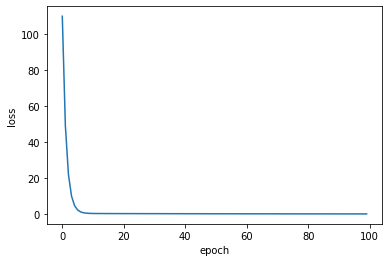

In [60]:
# plot
plt.plot(epoch_list, loss_list) 
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.show()